# Biasedness of Maximum Likelihood Estimator

Visualization of the biasedness of the maximum likelihood estimator for the variance af a gaussian distribution.


### Setting up the underlying gaussian distribution and the estimators for the mean and the variance.

In [17]:
import numpy as np

# parameters for underlying gaussian distribution
mean = 0
variance = 2

# draw samples from underlying gaussian destribution
def draw_sample(mean, variance, sample_size):
    return np.random.normal(mean, np.sqrt(variance), sample_size)

# sample mean (maximum likelihood estimator for the mean of the underlying gaussian distribution)
sample_mean = lambda samples: (1/len(samples)) * np.sum(samples)

# sample variance (maximum likelihood estimator for the variance of the underlying gaussian distribution)
sample_variance = lambda samples: (1/len(samples)) * np.sum((samples - sample_mean(samples)) ** 2)

# unbiased sample variance
unbiased_sample_variance = lambda samples: (1/(len(samples) - 1)) * np.sum((samples - sample_mean(samples)) ** 2)

### Plotting multiple estimations for the mean and the variance with different samples sizes.

The **first row** plots the estimated (maximum likelihood) mean in orange with sample sizes 5, 50 and 500. The **second row** plots the estimated (maximum likelihood) variance in orange with sample sizes 5, 50 and 500. Note that it is biased and underestimates the true variance. The **third row** plots the estimated (unbiased) variance in orange with sample sizes 5, 50 and 500. Note that it is unbiased and does not underestimates the true variance.

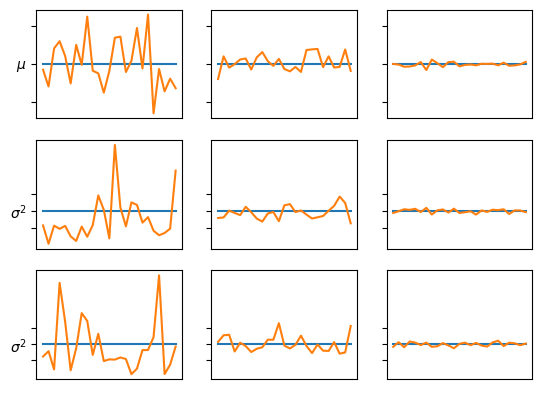

In [39]:
import matplotlib.pyplot as plt

%matplotlib inline

sample_sizes = [5, 50, 500]
number_of_estimations = 25

# setup plot
fig, axs = plt.subplots(3, 3, sharey='row')

for i in range(len(sample_sizes)):
    # setup
    axs[0, i].set_xticks(())
    axs[0, i].set_yticks((mean - 1, mean, mean + 1), ['', r'$\mu$', ''])
    axs[0, i].label_outer()
    # plot
    axs[0, i].plot(range(number_of_estimations), np.full(number_of_estimations, mean))
    axs[0, i].plot(range(number_of_estimations), [sample_mean(draw_sample(mean, variance, sample_sizes[i])) for _ in range(number_of_estimations)])
    
for i in range(len(sample_sizes)):
    # setup
    axs[1, i].set_xticks(())
    axs[1, i].set_yticks((variance - 1, variance, variance + 1), ['', r'$\sigma^2$', ''])
    axs[1, i].label_outer()
    # plot
    axs[1, i].plot(range(number_of_estimations), np.full(number_of_estimations, variance))
    axs[1, i].plot(range(number_of_estimations), [sample_variance(draw_sample(mean, variance, sample_sizes[i])) for _ in range(number_of_estimations)])

for i in range(len(sample_sizes)):
    # setup
    axs[2, i].set_xticks(())
    axs[2, i].set_yticks((variance - 1, variance, variance + 1), ['', r'$\sigma^2$', ''])
    axs[2, i].label_outer()
    # plot
    axs[2, i].plot(range(number_of_estimations), np.full(number_of_estimations, variance))
    axs[2, i].plot(range(number_of_estimations), [unbiased_sample_variance(draw_sample(mean, variance, sample_sizes[i])) for _ in range(number_of_estimations)])

plt.show()


### Plotting the estimated Gaussian bell curves

Note that when the sample size N is small, the biased estimated distribution is significantly more narrow than the unbiased estimated distribution.

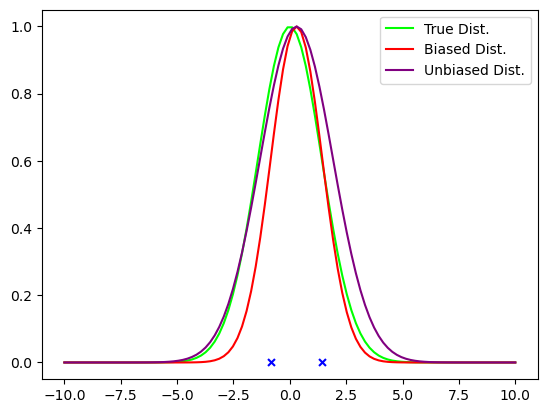

In [42]:


# setup plot
fig, ax = plt.subplots()
x = np.linspace(-10, 10, 100)

# gaussian bell curve
gaussian = lambda x, mean, variance: np.exp(-np.power(x - mean, 2) / (2 * variance))

# draw samples
N = 2
samples = draw_sample(mean, variance, N)


# plot underlying gaussian distribution
ax.plot(x, gaussian(x, mean, variance), color='lime', label='True Dist.')

# plot samples
ax.scatter(samples, np.zeros(N), s=25, c='blue', marker='x')

# plot estimated gaussian distribution
ax.plot(x, gaussian(x, sample_mean(samples), sample_variance(samples)), color='red', label='Biased Dist.')

# plot unbiased estimated gaussian distribution
ax.plot(x, gaussian(x, sample_mean(samples), unbiased_sample_variance(samples)), color='purple', label='Unbiased Dist.')

ax.legend()
plt.show()